In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
all_data = pd.read_pickle("new_sales_features.pickle")
def get_X_y(df, end, clip_value = 20):
    df = df.loc[df.date_block_num <= end]
    X = df.drop(["target", "shop_block_target_mean", "shop_block_target_sum", 
                 "item_block_target_sum", "item_block_target_mean", "item_cat_block_target_mean", 
                "item_cat_block_target_sum"], axis = 1)
    
    y = np.clip(df.target, 0, clip_value)
    return X, y
X,y = get_X_y(all_data, 33)
X = X.drop("date_block_num", axis = 1)
X.head()

,shop_id,item_id,item_category_id,item_block_target_mean_lag_1,item_block_target_sum_lag_1,shop_block_target_mean_lag_1,shop_block_target_sum_lag_1,item_cat_block_target_mean_lag_1,item_cat_block_target_sum_lag_1,target_lag_1,...,target_lag_12,item_block_target_mean_lag_24,item_block_target_sum_lag_24,shop_block_target_mean_lag_24,shop_block_target_sum_lag_24,item_cat_block_target_mean_lag_24,item_cat_block_target_sum_lag_24,target_lag_24,Newyear,off_season
8428273,27,20463,72,1.050000,63.0,1.429917,7896.0,1.089438,3971.0,5.0,...,0.0,0.000000,0.0,1.181431,5548.0,1.193452,802.0,0.0,1,0
8428274,27,20462,72,1.033333,62.0,1.429917,7896.0,1.089438,3971.0,0.0,...,0.0,0.000000,0.0,1.181431,5548.0,1.193452,802.0,0.0,1,0
8428275,27,20448,72,1.100000,44.0,1.429917,7896.0,1.089438,3971.0,3.0,...,2.0,0.000000,0.0,1.181431,5548.0,1.193452,802.0,0.0,1,0
8428276,27,20417,72,1.000000,9.0,1.429917,7896.0,1.089438,3971.0,0.0,...,0.0,1.076923,28.0,1.181431,5548.0,1.193452,802.0,0.0,1,0
8428277,27,20419,72,1.000000,5.0,1.429917,7896.0,1.089438,3971.0,0.0,...,0.0,0.000000,0.0,1.181431,5548.0,1.193452,802.0,0.0,1,0


In [4]:
y.to_pickle("train_y.pickle")

In [6]:
RF_model = RandomForestRegressor(n_estimators=100, max_depth=6, 
                                 min_samples_leaf = 100,random_state=10,verbose = 10)
RF_model.fit(X,y)

building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.9s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   31.2s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   42.1s remaining:    0.0s


building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   52.2s remaining:    0.0s


building tree 6 of 100


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min remaining:    0.0s


building tree 7 of 100


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


building tree 8 of 100


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s


building tree 9 of 100


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.5min remaining:    0.0s


building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 17.0min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=10, verbose=10, warm_start=False)

In [7]:
test_lags = pd.read_pickle("test_with_lags.pickle")
test_lags = test_lags.drop(["date_block_num", "target", "shop_block_target_sum", 
                           "shop_block_target_mean", "item_block_target_mean",
                           "item_block_target_sum", "item_cat_block_target_sum",
                           "item_cat_block_target_mean"], axis = 1)
test_lags

,shop_id,item_id,item_category_id,item_block_target_mean_lag_1,item_block_target_sum_lag_1,shop_block_target_mean_lag_1,shop_block_target_sum_lag_1,item_cat_block_target_mean_lag_1,item_cat_block_target_sum_lag_1,target_lag_1,...,target_lag_12,item_block_target_mean_lag_24,item_block_target_sum_lag_24,shop_block_target_mean_lag_24,shop_block_target_sum_lag_24,item_cat_block_target_mean_lag_24,item_cat_block_target_sum_lag_24,target_lag_24,Newyear,off_season
10913850,5,5037,19,1.000000,25.0,1.090155,1052.0,1.041791,2443.0,0.0,...,1.0,0.000000,0.0,1.131922,1390.0,1.209159,9030.0,0.0,0,0
10913851,5,5320,55,0.000000,0.0,1.090155,1052.0,1.022715,5808.0,0.0,...,0.0,0.000000,0.0,1.131922,1390.0,1.027602,11541.0,0.0,0,0
10913852,5,5233,19,1.024390,42.0,1.090155,1052.0,1.041791,2443.0,1.0,...,0.0,0.000000,0.0,1.131922,1390.0,1.209159,9030.0,0.0,0,0
10913853,5,5232,23,0.933333,28.0,1.090155,1052.0,1.055582,2203.0,0.0,...,0.0,0.000000,0.0,1.131922,1390.0,1.169405,5978.0,0.0,0,0
10913854,5,5268,20,0.000000,0.0,1.090155,1052.0,1.625431,6596.0,0.0,...,0.0,0.000000,0.0,1.131922,1390.0,4.161148,1885.0,0.0,0,0
10913855,5,5039,23,1.035714,29.0,1.090155,1052.0,1.055582,2203.0,1.0,...,0.0,0.000000,0.0,1.131922,1390.0,1.169405,5978.0,0.0,0,0
10913856,5,5041,20,1.033333,62.0,1.090155,1052.0,1.625431,6596.0,2.0,...,0.0,0.000000,0.0,1.131922,1390.0,4.161148,1885.0,0.0,0,0
10913857,5,5046,55,1.000000,12.0,1.090155,1052.0,1.022715,5808.0,0.0,...,1.0,0.000000,0.0,1.131922,1390.0,1.027602,11541.0,0.0,0,0
10913858,5,5319,55,1.000000,26.0,1.090155,1052.0,1.022715,5808.0,0.0,...,5.0,0.000000,0.0,1.131922,1390.0,1.027602,11541.0,0.0,0,0
10913859,5,5003,20,1.187500,95.0,1.090155,1052.0,1.625431,6596.0,0.0,...,0.0,0.000000,0.0,1.131922,1390.0,4.161148,1885.0,0.0,0,0


In [9]:
test_pred = RF_model.predict(test_lags)
test_pred

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


array([ 0.3385882 ,  0.05930815,  0.57305575, ...,  0.05930815,
        0.05930815,  0.05930815])

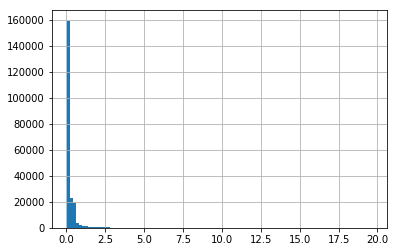

In [11]:
pd.Series(test_pred).hist(bins = 100)

In [12]:
train_pred = RF_model.predict(X)
from sklearn.metrics import mean_squared_error
from math import sqrt
def root_mean_square_error(truth, pred):
    return sqrt(mean_squared_error(truth, pred))
print(root_mean_square_error(y.values, train_pred))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s


0.8580350317202664


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.9s finished


In [13]:
sample = pd.read_csv("../sample_submission.csv")
sample["item_cnt_month"] = test_pred
sub = sample
sub.to_csv("submission/submission_RF_model.csv", index = False)

In [14]:
sub.head(5)

,ID,item_cnt_month
0,0,0.338588
1,1,0.059308
2,2,0.573056
3,3,0.342845
4,4,0.473250


In [15]:
!pwd

/Users/ch/PycharmProjects/predict_future_sales/predict_for_sales


In [16]:
!kaggle competitions submit -c competitive-data-science-predict-future-sales -f submission/submission_RF_model.csv -m "Message"


Successfully submitted to Predict Future Sales

In [19]:
%store train_pred

Stored 'train_pred' (ndarray)
